# Decision Tree model for Morris Louis art

In [180]:
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import graphviz 
import pydotplus
import sklearn
import pickle

## Get the metrics data for the artwork

In [308]:
data = pd.DataFrame.from_csv('../../data/data.csv')

In [309]:
data = data[['period','shannon_entropy','mean_color_r','luminance','contrast', 'contour']]

In [310]:
data.head()

,period,shannon_entropy,mean_color_r,luminance,contrast,contour
1,themes_variations_59_60,7.577162,179.380990,147.490592,0.691603,0.000051
2,themes_variations_59_60,7.579554,162.274002,126.479898,0.834955,0.000693
3,themes_variations_59_60,7.387632,103.497806,113.420688,0.848749,0.000054
4,themes_variations_59_60,7.853511,154.675751,127.536419,0.904835,0.001158
5,themes_variations_59_60,7.246964,95.234639,84.107295,0.995782,0.005167


## Create the classifier and train the model

In [311]:
# Create the decision tree classifier
clf = tree.DecisionTreeClassifier()

In [312]:
# split the data into training and test data
features = data[['shannon_entropy','mean_color_r','luminance','contrast', 'contour']]
target = data['period']
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)


In [313]:
# Train the model
clf.fit(features_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

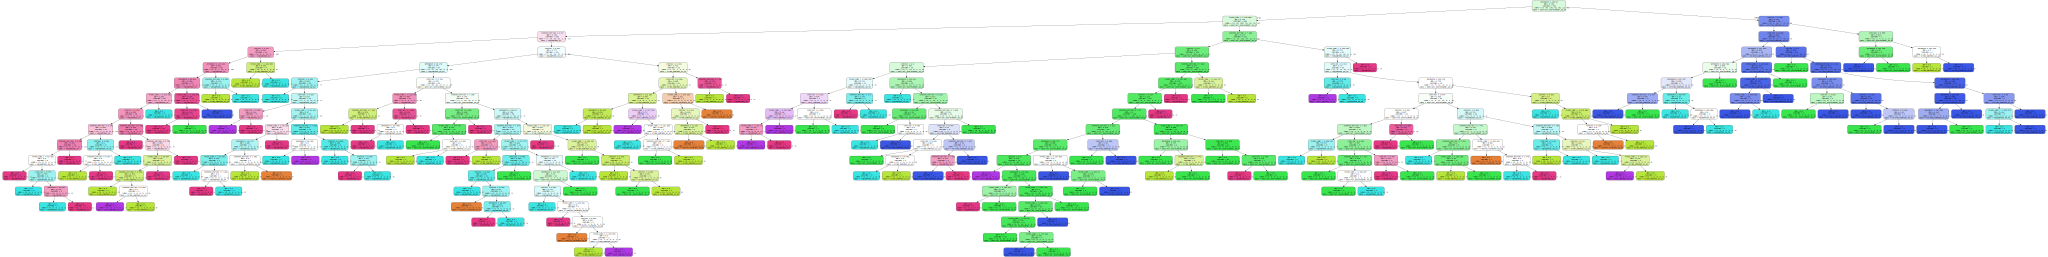

In [314]:
# Plot the Decicion Tree
dot_data = tree.export_graphviz(
   clf, out_file=None,
   feature_names=['shannon_entropy','mean_color_r','luminance','contrast', 'contour'],  
   class_names=list(target.unique()),  
   filled=True, rounded=True,  
   special_characters=True)  

# Save the graphic representation of the tree into an image file
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("MorrisTree.png")

# Display the tree
graph = graphviz.Source(dot_data)  
graph

In [315]:
# Score the model on the training data
clf.score(features_train, target_train)

1.0

## Predict the test data using the trained model

In [316]:
p = clf.predict(features_test)
for i in range(0, len(p)):
    print(p[i] == target_test.tolist()[i], p[i], target_test.tolist()[i])


True abstract_expressionist_55_57 abstract_expressionist_55_57
False stripe_paintings_61_62 unfurled_paintings_60_61
False stripe_paintings_61_62 veil_paintings_54
True veil_paintings_58_59 veil_paintings_58_59
False stripe_paintings_61_62 unfurled_paintings_60_61
True early_paintings_34_53 early_paintings_34_53
False early_paintings_34_53 veil_paintings_54
False abstract_expressionist_55_57 veil_paintings_58_59
False early_paintings_34_53 veil_paintings_58_59
True stripe_paintings_61_62 stripe_paintings_61_62
True unfurled_paintings_60_61 unfurled_paintings_60_61
True unfurled_paintings_60_61 unfurled_paintings_60_61
False themes_variations_59_60 stripe_paintings_61_62
False unfurled_paintings_60_61 themes_variations_59_60
False themes_variations_59_60 veil_paintings_58_59
True veil_paintings_58_59 veil_paintings_58_59
True stripe_paintings_61_62 stripe_paintings_61_62
True stripe_paintings_61_62 stripe_paintings_61_62
False themes_variations_59_60 veil_paintings_58_59
False veil_pain

In [317]:
# Score the model on the test data
clf.score(features_test, target_test)

0.5454545454545454

In [244]:
# Check the accuracy score for the predicted values
sklearn.metrics.accuracy_score(target_test,p)

0.5696969696969697

In [245]:
# Save the model to a file
filename = "MorrisDecisionTree.pkl"
pickle.dump(clf, open(filename, "wb"))

In [318]:
# load the model from disk
loaded_clf = pickle.load(open(filename, "rb"))

In [319]:
loaded_clf.score(features_test, target_test)

0.5696969696969697